In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('train_ctrUa4K.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_train.shape

(614, 13)

In [4]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df_train['Dependents']=df_train['Dependents'].str.replace('+','')
df_train['Dependents']=df_train['Dependents'].str.replace(' ','')
df_train['Dependents']=df_train['Dependents'].replace('0',0)
df_train['Dependents']=df_train['Dependents'].replace('1',1)
df_train['Dependents']=df_train['Dependents'].replace('2',2)
df_train['Dependents']=df_train['Dependents'].replace('3',3)

In [6]:
df_train['Dependents']=df_train['Dependents'].fillna(0)

In [7]:
df_train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

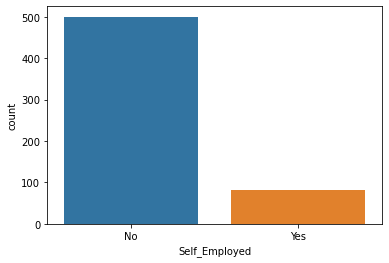

In [8]:
sns.countplot(df_train['Self_Employed'])

In [9]:
df_train['Self_Employed'] = df_train['Self_Employed'].fillna('No')

In [10]:
df_train['Self_Employed'].isnull().any()

False

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

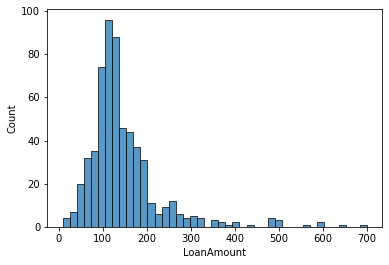

In [11]:
sns.histplot(df_train['LoanAmount'])

In [12]:
df_train['LoanAmount']=df_train['LoanAmount'].fillna(df_train['LoanAmount'].median())

In [13]:
df_train['LoanAmount'].isnull().any()

False

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

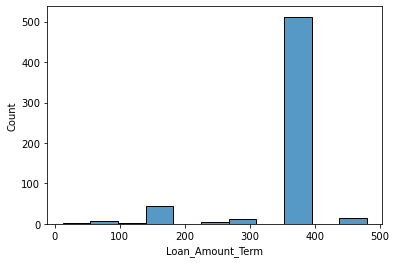

In [14]:
sns.histplot(df_train['Loan_Amount_Term'])

In [15]:
df_train['Loan_Amount_Term']=df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median())

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

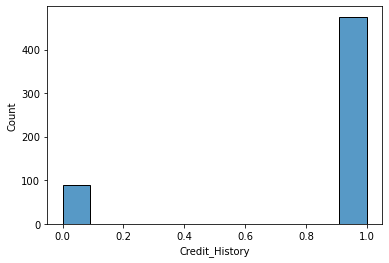

In [16]:
sns.histplot(df_train['Credit_History'])

In [17]:
df_train['Credit_History']=df_train['Credit_History'].fillna(1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

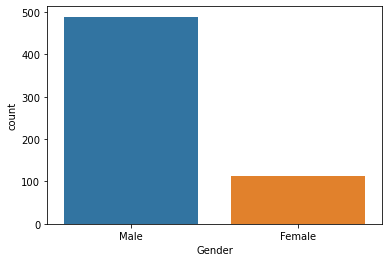

In [18]:
sns.countplot(df_train['Gender'])

In [19]:
df_train['Gender']=df_train['Gender'].fillna('Male')

<AxesSubplot:xlabel='Married', ylabel='count'>

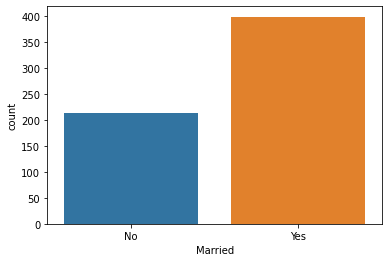

In [20]:
sns.countplot(df_train['Married'])

In [21]:
df_train['Married']=df_train['Married'].fillna('Yes')

In [22]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df_train.shape

(614, 13)

In [24]:
import re

In [25]:
cat = df_train.select_dtypes(exclude='number')
num = df_train.select_dtypes(include='number')

In [26]:
cat

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,Rural,Y
610,LP002979,Male,Yes,Graduate,No,Rural,Y
611,LP002983,Male,Yes,Graduate,No,Urban,Y
612,LP002984,Male,Yes,Graduate,No,Urban,Y


In [27]:
num

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,128.0,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0
3,0.0,2583,2358.0,120.0,360.0,1.0
4,0.0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0
610,3.0,4106,0.0,40.0,180.0,1.0
611,1.0,8072,240.0,253.0,360.0,1.0
612,2.0,7583,0.0,187.0,360.0,1.0


In [28]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['RepaymentCapability'] = df_train['TotalIncome']/df_train['LoanAmount']
df_train['LoanInstalment'] = df_train['LoanAmount']/df_train['Loan_Amount_Term']

In [29]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,RepaymentCapability,LoanInstalment
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,45.695312,0.355556
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,47.585938,0.355556
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,45.454545,0.183333
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,41.175000,0.333333
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,42.553191,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,40.845070,0.197222
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,102.650000,0.222222
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,32.853755,0.702778
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,40.550802,0.519444


In [30]:
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='count'>

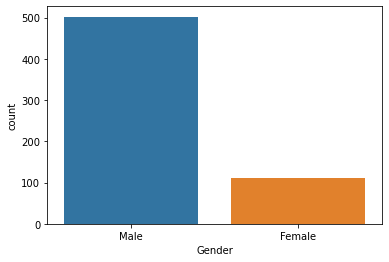

In [31]:
sns.countplot(df_train['Gender'])

In [32]:
gender = {'Male': 1,'Female': 2}
  
df_train['Gender'] = [gender[item] for item in df_train['Gender']]

<AxesSubplot:xlabel='Gender', ylabel='count'>

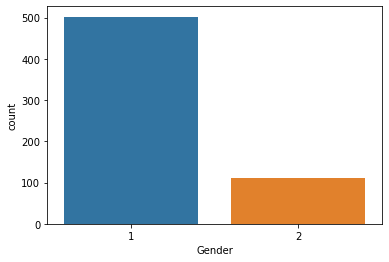

In [33]:
sns.countplot(df_train['Gender'])

In [34]:
df_train['Married'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Married', ylabel='count'>

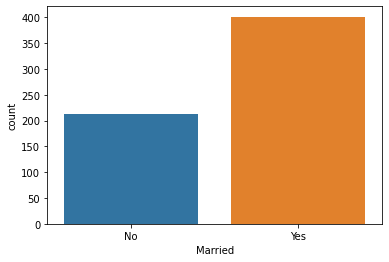

In [35]:
sns.countplot(df_train['Married'])

In [36]:
married = {'No': 0,'Yes': 1}
  
df_train['Married'] = [married[item] for item in df_train['Married']]

<AxesSubplot:xlabel='Married', ylabel='count'>

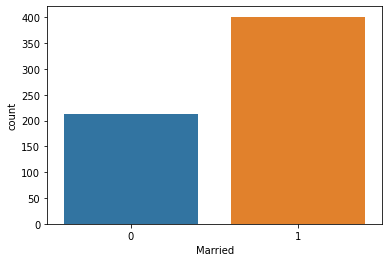

In [37]:
sns.countplot(df_train['Married'])

<AxesSubplot:xlabel='Education', ylabel='count'>

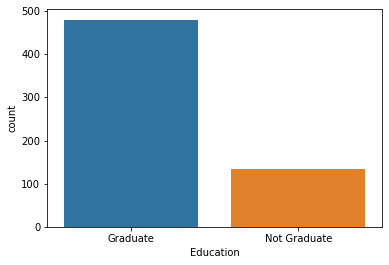

In [38]:
sns.countplot(df_train['Education'])

In [39]:
df_train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [40]:
education = {'Not Graduate': 0,'Graduate': 1}
  
df_train['Education'] = [education[item] for item in df_train['Education']]

<AxesSubplot:xlabel='Education', ylabel='count'>

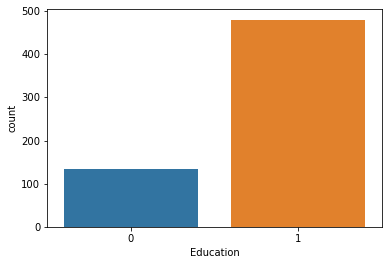

In [41]:
sns.countplot(df_train['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

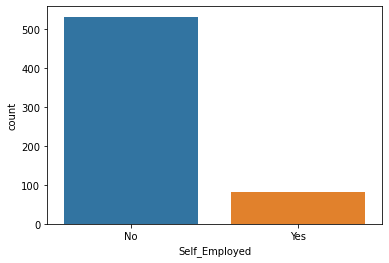

In [42]:
sns.countplot(df_train['Self_Employed'])

In [43]:
employed = {'No': 0,'Yes': 1}
  
df_train['Self_Employed'] = [employed[item] for item in df_train['Self_Employed']]

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

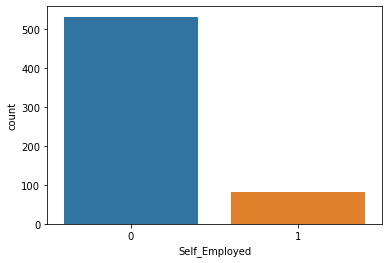

In [44]:
sns.countplot(df_train['Self_Employed'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

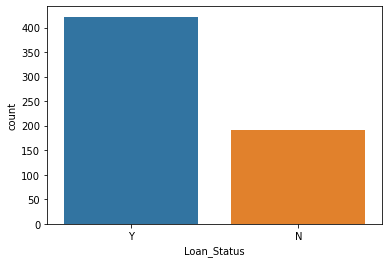

In [45]:
sns.countplot(df_train['Loan_Status'])

In [46]:
status = {'Y': 1,'N': 0}
  
df_train['Loan_Status'] = [status[item] for item in df_train['Loan_Status']]

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

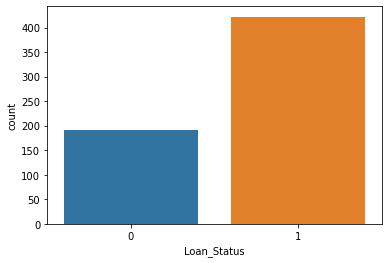

In [47]:
sns.countplot(df_train['Loan_Status'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

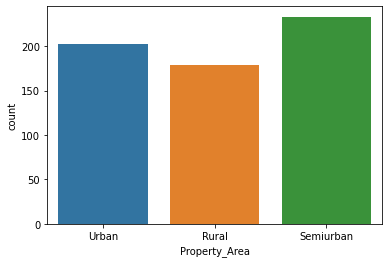

In [48]:
sns.countplot(df_train['Property_Area'])

In [49]:
area = {'Urban': 1,'Rural': 3, 'Semiurban': 2}
  
df_train['Property_Area'] = [area[item] for item in df_train['Property_Area']]

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

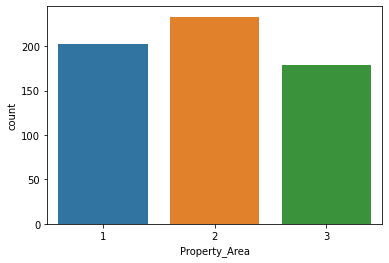

In [50]:
sns.countplot(df_train['Property_Area'])

In [51]:
import re

In [52]:
df_train['Loan_ID'] = df_train['Loan_ID'].str.replace('LP','')
df_train['Loan_ID'] = pd.to_numeric(df_train['Loan_ID'])

In [53]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,RepaymentCapability,LoanInstalment
0,1002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1,5849.0,45.695312,0.355556
1,1003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,3,0,6091.0,47.585938,0.355556
2,1005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1,3000.0,45.454545,0.183333
3,1006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0,41.175000,0.333333
4,1008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1,6000.0,42.553191,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2978,2,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,3,1,2900.0,40.845070,0.197222
610,2979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,3,1,4106.0,102.650000,0.222222
611,2983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1,8312.0,32.853755,0.702778
612,2984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1,7583.0,40.550802,0.519444


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'RepaymentCapability', 'LoanInstalment'],
      dtype='object')

In [56]:
# scaling = ['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area',
#        'TotalIncome', 'RepaymentCapability', 'LoanInstalment']
# df_train[scaling]=StandardScaler().fit_transform(df_train[scaling])

In [57]:
cat = df_train.select_dtypes(exclude='number')
num = df_train.select_dtypes(include='number')

In [58]:
cat.columns

Index([], dtype='object')

In [59]:
data = df_train
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,RepaymentCapability,LoanInstalment
0,1002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1,5849.0,45.695312,0.355556
1,1003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,3,0,6091.0,47.585938,0.355556
2,1005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1,3000.0,45.454545,0.183333
3,1006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1,4941.0,41.175000,0.333333
4,1008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1,6000.0,42.553191,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2978,2,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,3,1,2900.0,40.845070,0.197222
610,2979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,3,1,4106.0,102.650000,0.222222
611,2983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1,8312.0,32.853755,0.702778
612,2984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1,7583.0,40.550802,0.519444


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

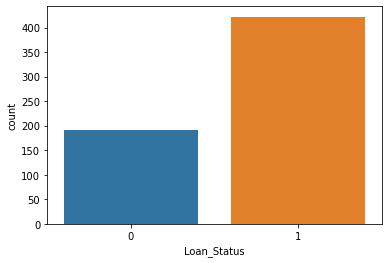

In [60]:
sns.countplot(data['Loan_Status'])

In [61]:
print("Value count in Loan Status\n-----------------\n",data.Loan_Status.value_counts())
print("\nPercentage of value count in Loan Status\n------------------------------\n",data.Loan_Status.value_counts(normalize=True)*100)

Value count in Loan Status
-----------------
 1    422
0    192
Name: Loan_Status, dtype: int64

Percentage of value count in Loan Status
------------------------------
 1    68.729642
0    31.270358
Name: Loan_Status, dtype: float64


In [62]:
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (614, 15)
y shape: (614,)


In [63]:
from xgboost import XGBClassifier

[02:00:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

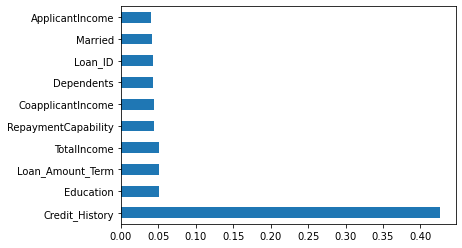

In [64]:
pd.Series(XGBClassifier().fit(X,y).feature_importances_,index=X.columns).nlargest(10).plot.barh()

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

<AxesSubplot:>

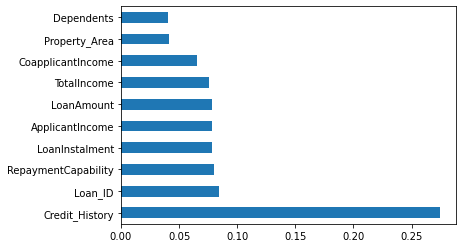

In [66]:
pd.Series(ExtraTreesClassifier().fit(X,y).feature_importances_,index=X.columns).nlargest(10).plot.barh()

In [67]:
from catboost import CatBoostClassifier

<AxesSubplot:>

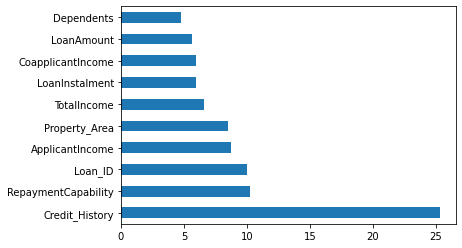

In [68]:
pd.Series(CatBoostClassifier(verbose=False).fit(X,y).feature_importances_,index=X.columns).nlargest(10).plot.barh()

In [69]:
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:>

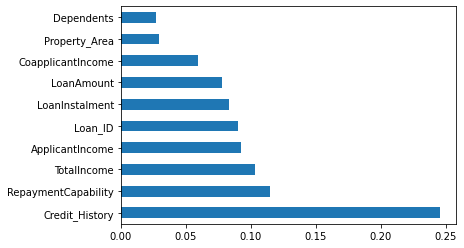

In [70]:
pd.Series(RandomForestClassifier(verbose=False).fit(X,y).feature_importances_,index=X.columns).nlargest(10).plot.barh()

In [71]:
from lightgbm import LGBMClassifier

<AxesSubplot:>

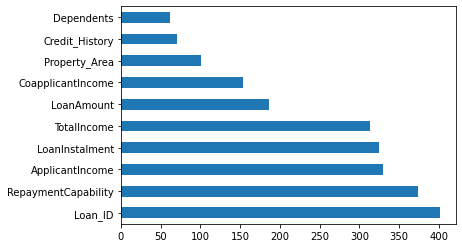

In [72]:
pd.Series(LGBMClassifier().fit(X,y).feature_importances_,index=X.columns).nlargest(10).plot.barh()

In [73]:
X_bf=X[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'TotalIncome', 'RepaymentCapability', 'LoanInstalment']]

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X_bf,y,test_size = 0.3,random_state=1)
print(f'Train set X shape: {X_train.shape}')
print(f'Train set y shape: {y_train.shape}')
print(f'Test set X shape: {X_test.shape}')
print(f'Test set y shape: {y_test.shape}')

Train set X shape: (429, 14)
Train set y shape: (429,)
Test set X shape: (185, 14)
Test set y shape: (185,)


In [76]:
from sklearn.model_selection import StratifiedKFold

In [77]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [79]:
xgb = XGBClassifier(verbosity=0)

In [80]:
cross_val_scores_xgb = (cross_val_score(xgb,X,y,cv=kf,scoring='accuracy'))
print(cross_val_scores_xgb.mean())

0.7866737176097303


In [81]:
from sklearn.ensemble import ExtraTreesClassifier

In [82]:
cross_val_scores_etc = (cross_val_score(ExtraTreesClassifier(),X,y,cv=kf,scoring='accuracy'))
print(cross_val_scores_etc.mean())

0.7965362242199894


In [83]:
from catboost import CatBoostClassifier

In [84]:
cross_val_scores_cbc = (cross_val_score(CatBoostClassifier(verbose=False),X,y,cv=kf,scoring='accuracy'))
print(cross_val_scores_cbc.mean())

0.8209148598625067


In [85]:
from lightgbm import LGBMClassifier

In [86]:
cross_val_scores_lgbm = (cross_val_score(LGBMClassifier(),X,y,cv=kf,scoring='accuracy'))
print(cross_val_scores_lgbm.mean())

0.7899259650978319


In [87]:
from sklearn.metrics import r2_score, accuracy_score

In [100]:
clf_xgb=XGBClassifier(verbosity=0,n_estimators=4, max_depth=4, eta=0.4, max_delta_step=1.4)
clf_xgb_1=clf_xgb.fit(X_train,y_train)
y_pred_clf_xgb_1=clf_xgb_1.predict(X_train)
y_pred_clf_xgb_2=clf_xgb_1.predict(X_test)
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clf_xgb_1)))
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_test,y_pred_clf_xgb_2)))
print('Difference (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clf_xgb_1)-accuracy_score(y_test,y_pred_clf_xgb_2)))

Accuracy score (accuracy): 0.8392
Accuracy score (accuracy): 0.8108
Difference (accuracy): 0.0284


In [99]:
# for estimator in (x*0.1 for x in range(1,100)):
#     model=XGBClassifier(verbosity=0, n_estimators=4, max_depth=4, eta=0.4, max_delta_step=estimator).fit(X_train,y_train)
#     acc_train=model.predict(X_train)
#     acc_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 accuracy_score(y_train,acc_train),
#                                                                                                 accuracy_score(y_test,acc_test),
#                                                                                                 accuracy_score(y_train,acc_train)-accuracy_score(y_test,acc_test)))

In [90]:
from sklearn.calibration import CalibratedClassifierCV

In [110]:
clb_xgb = CalibratedClassifierCV(clf_xgb, cv=10, method='isotonic')
clb_xgb_1 = clb_xgb.fit(X_train, y_train)
y_pred_clb_xgb_1=clb_xgb_1.predict(X_train)
y_pred_clb_xgb_2=clb_xgb_1.predict(X_test)
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clb_xgb_1)))
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_test,y_pred_clb_xgb_2)))
print('Difference (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clb_xgb_1)-accuracy_score(y_test,y_pred_clb_xgb_2)))

Accuracy score (accuracy): 0.8345
Accuracy score (accuracy): 0.8000
Difference (accuracy): 0.0345


In [119]:
clf_cbc=CatBoostClassifier(verbose=False, iterations=11, max_depth=6, learning_rate=0.45, l2_leaf_reg=3)
clf_cbc_1=clf_cbc.fit(X_train,y_train)
y_pred_clf_cbc_1=clf_cbc_1.predict(X_train)
y_pred_clf_cbc_2=clf_cbc_1.predict(X_test)
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clf_cbc_1)))
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_test,y_pred_clf_cbc_2)))
print('Difference (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clf_cbc_1)-accuracy_score(y_test,y_pred_clf_cbc_2)))

Accuracy score (accuracy): 0.8392
Accuracy score (accuracy): 0.8054
Difference (accuracy): 0.0338


In [118]:
# for estimator in (x*0.1 for x in range(1,100)):
#     model=CatBoostClassifier(verbose=False, iterations=11, max_depth=6, learning_rate=0.45, l2_leaf_reg=estimator).fit(X_train,y_train)
#     acc_train=model.predict(X_train)
#     acc_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 accuracy_score(y_train,acc_train),
#                                                                                                 accuracy_score(y_test,acc_test),
#                                                                                                 accuracy_score(y_train,acc_train)-accuracy_score(y_test,acc_test)))

In [128]:
clf_lgbm=LGBMClassifier(num_iterations=79, learning_rate=0.1, max_depth=4, num_leaves=8)
clf_lgbm_1=clf_lgbm.fit(X_train,y_train)
y_pred_clf_lgbm_1=clf_lgbm_1.predict(X_train)
y_pred_clf_lgbm_2=clf_lgbm_1.predict(X_test)
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clf_lgbm_1)))
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_test,y_pred_clf_lgbm_2)))
print('Difference (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clf_lgbm_1)-accuracy_score(y_test,y_pred_clf_lgbm_2)))

Accuracy score (accuracy): 0.8858
Accuracy score (accuracy): 0.8054
Difference (accuracy): 0.0804


In [127]:
# for estimator in (x*1 for x in range(2,100)):
#     model=LGBMClassifier(num_iterations=estimator).fit(X_train,y_train)
#     acc_train=model.predict(X_train)
#     acc_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 accuracy_score(y_train,acc_train),
#                                                                                                 accuracy_score(y_test,acc_test),
#                                                                                                 accuracy_score(y_train,acc_train)-accuracy_score(y_test,acc_test)))

In [133]:
from sklearn.ensemble import StackingClassifier

In [130]:
est = [('xgb',clf_xgb),('clb',clb_xgb),('cbc',clf_cbc)]

In [156]:
# for estimator in (x*0.1 for x in range(1,100)):
#     model=StackingClassifier(n_jobs=-1,estimators=est,final_estimator=CatBoostClassifier(verbose=False, iterations=8,
#                                                                                          max_depth=7,
#                                                                                          learning_rate=0.5,
#                                                                                          l2_leaf_reg=estimator),
#                             passthrough=True).fit(X_train,y_train)
#     acc_train=model.predict(X_train)
#     acc_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 accuracy_score(y_train,acc_train),
#                                                                                                 accuracy_score(y_test,acc_test),
#                                                                                                 accuracy_score(y_train,acc_train)-accuracy_score(y_test,acc_test)))

In [157]:
stacked=StackingClassifier(n_jobs=-1,estimators=est,final_estimator=CatBoostClassifier(verbose=False,iterations=8,
                                                                                         max_depth=7,
                                                                                         learning_rate=0.5),passthrough=True)

In [158]:
stacked_1=stacked.fit(X_train,y_train)
y_pred_clf_stacked_1=stacked_1.predict(X_train)
y_pred_clf_stacked_2=stacked_1.predict(X_test)
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clf_stacked_1)))
print('Accuracy score (accuracy): {:.4f}'.format(accuracy_score(y_test,y_pred_clf_stacked_2)))
print('Difference (accuracy): {:.4f}'.format(accuracy_score(y_train,y_pred_clf_stacked_1)-accuracy_score(y_test,y_pred_clf_stacked_2)))

Accuracy score (accuracy): 0.8345
Accuracy score (accuracy): 0.8162
Difference (accuracy): 0.0183


### TEST DATASET

In [172]:
df_test=pd.read_csv('test_lAUu6dG.csv')

In [173]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [174]:
df_test['Dependents']=df_test['Dependents'].str.replace('+','')
df_test['Dependents']=df_test['Dependents'].str.replace(' ','')
df_test['Dependents']=df_test['Dependents'].replace('0',3)
df_test['Dependents']=df_test['Dependents'].replace('1',4)
df_test['Dependents']=df_test['Dependents'].replace('2',5)
df_test['Dependents']=df_test['Dependents'].replace('3',6)

In [175]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [176]:
df_test['Dependents']=df_test['Dependents'].fillna(0)
df_test['Self_Employed'] = df_test['Self_Employed'].fillna('No')
df_test['LoanAmount']=df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median())
df_test['Credit_History']=df_test['Credit_History'].fillna(1)
df_test['Gender']=df_test['Gender'].fillna('Male')

In [177]:
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['RepaymentCapability'] = df_test['TotalIncome']/df_test['LoanAmount']
df_test['LoanInstalment'] = df_test['LoanAmount']/df_test['Loan_Amount_Term']

In [178]:
gender = {'Male': 1,'Female': 2}
  
df_test['Gender'] = [gender[item] for item in df_test['Gender']]

married = {'No': 0,'Yes': 1}
  
df_test['Married'] = [married[item] for item in df_test['Married']]

education = {'Not Graduate': 0,'Graduate': 1}
  
df_test['Education'] = [education[item] for item in df_test['Education']]

employed = {'No': 0,'Yes': 1}
  
df_test['Self_Employed'] = [employed[item] for item in df_test['Self_Employed']]

area = {'Urban': 1,'Rural': 3, 'Semiurban': 2}
  
df_test['Property_Area'] = [area[item] for item in df_test['Property_Area']]

In [179]:
df_test.to_excel('OutputOriginal.xls')

In [180]:
dataset = df_test
dataset['Loan_ID'] = dataset['Loan_ID'].str.replace('LP','')
df_test['Loan_ID'] = pd.to_numeric(df_test['Loan_ID'])
dataset = dataset[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'TotalIncome', 'RepaymentCapability', 'LoanInstalment']]

In [181]:
# scaling = ['Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area',
#        'TotalIncome', 'RepaymentCapability', 'LoanInstalment']
# dataset[scaling]=StandardScaler().fit_transform(dataset[scaling])
# dataset

In [182]:
y_test_pred = stacked.predict(dataset)
print('y test prediction shape:',y_test_pred.shape)

y test prediction shape: (367,)


In [183]:
df_pred=pd.DataFrame(y_test_pred)

In [184]:
df_pred[0] = df_pred[0].replace(0,'N')
df_pred[0] = df_pred[0].replace(1,'Y')

In [185]:
df_pred

,0
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [186]:
df_pred.to_excel('Output1.xls')